Code for Variance Hammer's Analysis of Oathbound Knight Allies
==============================
This code is for the analysis accompanying the post on potential non-AdMech allies for an Imperial Knight army. The text of the post itself can be found at: http://www.variancehammer.com. Note that because this analysis uses random numbers, any results you obtain may differ from those on the blog posting due to random chance.

**Import the necessary libraries**  

These are easily obtained using the Anaconda Python Distribution, which is available free from http://www.continuum.io

In [4]:
%matplotlib inline

In [5]:
import numpy as np
import random as rand
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

As there is no Variance Hammer library available (yet), we need to define a couple useful functions. DiceRoller() is a function to roll an arbitrary number of d6 dice. Shooting() does what it says on the tin - it takes a number of shots, rolls the appropriate number of d6 dice, checks those results against Ballistic Skill, and if the shots are twin-linked, rerolls as appropriate. Note that at the moment this function does not work for BS values above 6.

In [6]:
def DiceRoller(n_rolls):
	try:
		dice = int(n_rolls)
	except ValueError:
		print("Number of dice to roll needs to be an integer")
	rolls = np.random.random_integers(6, size=(1.,dice))
	return rolls

In [7]:
def Shooting(BS, n_shots, twinlinked):
    try:
        BS = int(BS)
    except ValueError:
        print("BS needs to be an integer")
    try:
        n_shots = int(n_shots)
    except ValueError:
        print("Number of shots needs to be an integer")
    if twinlinked == "Y":
        shots = DiceRoller(n_shots)
        shots[shots > BS] = rand.randint(1,6)
    elif twinlinked =="N":
        shots = DiceRoller(n_shots)
    else:
        print("Designate Twin-linking with Y or N. Assumed to be off.")
        shots = DiceRoller(n_shots)

    hits = np.sum(shots.__ge__(7-BS))
    return shots,hits

In [8]:
# SAVE MUST BE MANUALLY SET - NOT AUTO-DETERMINED BY Save vs. AP
def Wounding(strength,toughness,save,n_hits,woundspermodel,auto,rend):
    try:
        toughness = int(toughness)
    except ValueError:
        print("Target toughness needs to be an integer")
    try:
        save = int(save)
    except ValueError:
        print("Save needs to be an integer (e.g. 3+ = 3)")
    try:
        n_hits = int(n_hits)
    except ValueError:
        print("The number of hits needs to be an integer")
    if strength == "D":
        pass
    elif strength == "D-1":
        pass
    else:
        try:
            strength = int(strength)
        except ValueError:
            print("Strength must be an integer or D")

    woundrolls = DiceRoller(n_hits)
    if rend ==1:
        auto == 1
    else:
        pass
    
    if auto == 0:
        if strength == "D":
            NoSaveD = np.sum(woundrolls==6)
            SaveD = np.sum(1<woundrolls) - NoSaveD
            saverolls = DiceRoller(SaveD)
            unsaved = np.sum(saverolls<save)
            unsaved_expanded = 0
            for k in range(unsaved):
                unsaved_expanded = unsaved_expanded + min(woundspermodel,rand.randint(1,3))
            for j in range(NoSaveD):
                unsaved_expanded = unsaved_expanded + min(woundspermodel,(rand.randint(1,6)+6))
            finalwounds = unsaved_expanded
        elif strength == "D-1":
            SaveD = np.sum(2<woundrolls)
            saverolls = DiceRoller(SaveD)
            unsaved = np.sum(saverolls<save)
            unsaved_expanded = 0
            for k in range(unsaved):
                unsaved_expanded = unsaved_expanded + min(woundspermodel,rand.randint(1,3))
            finalwounds = unsaved_expanded
        
        else:
            SvTDiff = strength-toughness
            ToWound = max(2,4-SvTDiff)
            wounds = np.sum(woundrolls.__ge__(ToWound))
            saverolls = DiceRoller(wounds)
            unsaved = np.sum(saverolls<(save))
            finalwounds = unsaved
            
    else:
        if strength == "D":
            NoSaveD = np.sum(woundrolls==6)
            SaveD = np.sum(1<woundrolls) - NoSaveD
            saverolls = DiceRoller(SaveD)
            unsaved = np.sum(saverolls<save)
            unsaved_expanded = 0
            for k in range(unsaved):
                unsaved_expanded = unsaved_expanded + min(woundspermodel,rand.randint(1,3))
            for j in range(NoSaveD):
                unsaved_expanded = unsaved_expanded + min(woundspermodel,(rand.randint(1,6)+6))
            finalwounds = unsaved_expanded
        elif strength == "D-1":
            SaveD = np.sum(2<woundrolls)
            saverolls = DiceRoller(SaveD)
            unsaved = np.sum(saverolls<save)
            unsaved_expanded = 0
            for k in range(unsaved):
                unsaved_expanded = unsaved_expanded + min(woundspermodel,rand.randint(1,3))
            finalwounds = unsaved_expanded
        
        else:
            SvTDiff = strength-toughness
            autowounds = np.sum(woundrolls>=auto)
            if rend == 1:
                rends = np.sum(woundrolls>=6)
            else:
                rends = 0  
            ToWound = max(2,4-SvTDiff)
            wounds = np.sum(woundrolls.__ge__(ToWound))
            if ToWound > 6:
                truewounds = autowounds
            else:
                truewounds = wounds
            saverolls = DiceRoller(truewounds-rends)
            if rend == 0:
                unsaved = np.sum(saverolls<(save))
            else:
                unsaved = np.sum(saverolls<(save)+rends)
            finalwounds = unsaved
        
    return finalwounds

def ArmorPen(strength,AV,save,n_hits,hullpoints):
    try:
        AV = int(AV)
    except ValueError:
        print("Target Armor Value needs to be an integer")
    try:
        save = int(save)
    except ValueError:
        print("Save needs to be an integer (e.g. 3+ = 3)")
    try:
        n_hits = int(n_hits)
    except ValueError:
        print("The number of hits needs to be an integer")
    if strength == "D":
        pass
    else:
        try:
            strength = int(strength)
        except ValueError:
            print("Strength must be an integer or D")
    
    if strength == "D":
        penrolls = DiceRoller(n_hits)
        NoSaveD = np.sum(penrolls==6)
        SaveD = np.sum(1<penrolls) - NoSaveD
        saverolls = DiceRoller(SaveD)
        unsaved = np.sum(saverolls<save)
        unsaved_expanded = 0
        for k in range(unsaved):
            unsaved_expanded = unsaved_expanded + min(hullpoints,rand.randint(1,3))
        for j in range(NoSaveD):
            unsaved_expanded = unsaved_expanded + min(hullpoints,(rand.randint(1,6)+6))
        final = min(hullpoints,unsaved_expanded)
    else:
        penrolls = DiceRoller(n_hits) + strength
        pen_and_glance = np.sum(penrolls.__ge__(AV))
        glances = np.sum(penrolls==AV)
        pens = pen_and_glance - glances
        saverolls = DiceRoller(pen_and_glance)
        unsaved = np.sum(saverolls<(save))
        final = min(hullpoints,unsaved)
        
    return final

def ArmorBane(strength,AV,save,n_hits,hullpoints):
    try:
        AV = int(AV)
    except ValueError:
        print("Target Armor Value needs to be an integer")
    try:
        save = int(save)
    except ValueError:
        print("Save needs to be an integer (e.g. 3+ = 3)")
    try:
        n_hits = int(n_hits)
    except ValueError:
        print("The number of hits needs to be an integer")
    if strength == "D":
        pass
    else:
        try:
            strength = int(strength)
        except ValueError:
            print("Strength must be an integer or D")
    
    if strength == "D":
        penrolls = DiceRoller(n_hits)
        NoSaveD = np.sum(penrolls==6)
        SaveD = np.sum(1<penrolls) - NoSaveD
        saverolls = DiceRoller(SaveD)
        unsaved = np.sum(saverolls<save)
        unsaved_expanded = 0
        for k in range(unsaved):
            unsaved_expanded = unsaved_expanded + min(hullpoints,rand.randint(1,3))
        for j in range(NoSaveD):
            unsaved_expanded = unsaved_expanded + min(hullpoints,(rand.randint(1,6)+6))
        final = min(hullpoints,unsaved_expanded)
    else:
        penrolls = DiceRoller(n_hits) + DiceRoller(n_hits) + strength
        pen_and_glance = np.sum(penrolls.__ge__(AV))
        glances = np.sum(penrolls==AV)
        pens = pen_and_glance - glances
        saverolls = DiceRoller(pen_and_glance)
        unsaved = np.sum(saverolls<(save))
        final = min(hullpoints,unsaved)
        
    return final

In [9]:
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})
runs = 10000

Wound Analysis: Scouts vs. Tactical Marines

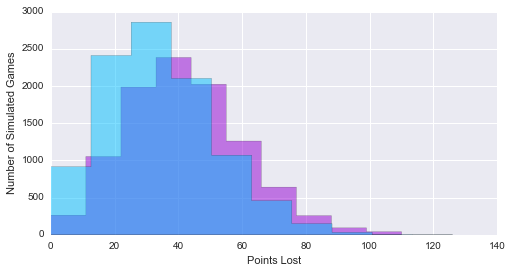

In [10]:
def ScoutsTakingFire():
    Shots = Shooting(4,20,'N')[1]
    Wounds = Wounding(4,4,4,Shots,1,auto=0,rend=0)
    return Wounds

def MarinesTakingFire():
    Shots = Shooting(4,20,'N')[1]
    Wounds = Wounding(4,4,3,Shots,1,auto=0,rend=0)
    return Wounds

no_cover = np.empty([runs,2])
for i in range(runs):
    no_cover[i][0] = ScoutsTakingFire()*11
    no_cover[i][1] = MarinesTakingFire()*14

plt.hist(no_cover[:,0],alpha=0.50,color="DarkViolet",histtype="stepfilled")
plt.hist(no_cover[:,1],alpha=0.50,color="DeepSkyBlue",histtype="stepfilled")
plt.xlabel("Points Lost")
plt.ylabel("Number of Simulated Games")

Wound Analysis: Scouts vs. Sisters of Battle

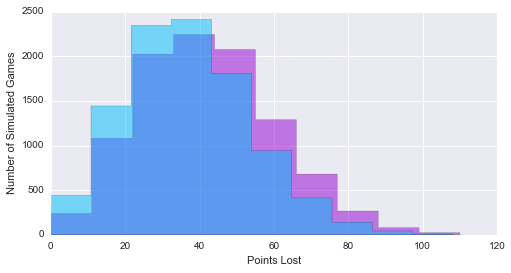

In [11]:
def SistersTakingFire():
    Shots = Shooting(4,20,'N')[1]
    Wounds = Wounding(4,3,3,Shots,1,auto=0,rend=0)
    return Wounds

sisvscout = np.empty([runs,2])
for i in range(runs):
    sisvscout[i][0] = ScoutsTakingFire()*11
    sisvscout[i][1] = SistersTakingFire()*12

plt.hist(sisvscout[:,0],alpha=0.50,color="DarkViolet",histtype="stepfilled")
plt.hist(sisvscout[:,1],alpha=0.50,color="DeepSkyBlue",histtype="stepfilled")
plt.xlabel("Points Lost")
plt.ylabel("Number of Simulated Games")

Just how nasty are Repentia?

In [45]:
def Repentia():
    RepentiaAttacks = Shooting(3,(4*4),'N')[1]
    RepentiaGorP = ArmorBane(6,13,7,RepentiaAttacks,11)
    return RepentiaGorP

In [46]:
RepentiavAv13 = np.empty([runs,1])

for r in range(runs):
    RepentiavAv13[r][0] = Repentia()

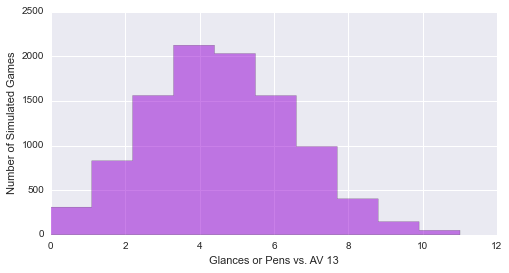

In [47]:
plt.hist(RepentiavAv13[:,0],alpha=0.50,color="DarkViolet",histtype="stepfilled")
plt.xlabel("Glances or Pens vs. AV 13")
plt.ylabel("Number of Simulated Games")